In [1]:
import numpy as np
import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Data Preprocessing**

In [3]:
import urllib

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
# 	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#     'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	
# 	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
# 	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#     'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
# 	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
# 	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
# 	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
# 	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
 ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading', fn, '...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file
# print("Download complete. Please check the checksums")

In [4]:
import tarfile
for idx, _ in enumerate(links):
  fn = '/content/drive/My Drive/images_%02d.tar.gz' % (idx+1)
  print('unzipping', fn, '...')
  tar = tarfile.open(fn, "r:gz")
  tar.extractall('/content/')
  tar.close()


unzipping /content/drive/My Drive/images_01.tar.gz ...
unzipping /content/drive/My Drive/images_02.tar.gz ...
unzipping /content/drive/My Drive/images_03.tar.gz ...


In [5]:
import os
len(os.listdir('/content/images'))

24999

In [ ]:
os.listdir('/content/images')[-10:-1]

['00000343_000.png',
 '00006046_004.png',
 '00002165_002.png',
 '00003098_007.png',
 '00004402_002.png',
 '00000569_006.png',
 '00001782_000.png',
 '00003029_011.png',
 '00002587_001.png']

In [ ]:
!du -sh /content/images

9.3G	/content/images


In [ ]:
# !cp /content/Data_Entry_2017_v2020.csv '/content/drive/My Drive/datasets'

In [ ]:
# !cp '/content/drive/My Drive/datasets/Data_Entry_2017_v2020.csv' /content/

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Data_Entry_2017_v2020.csv')

In [ ]:
df['Patient ID'].nunique()

30805

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
a = df['Finding Labels'].str.split(expand=True, pat = "|")

In [ ]:
a.head()

,0,1,2,3,4,5,6,7,8
0,Cardiomegaly,None,None,None,None,None,None,None,None
1,Cardiomegaly,Emphysema,None,None,None,None,None,None,None
2,Cardiomegaly,Effusion,None,None,None,None,None,None,None
3,No Finding,None,None,None,None,None,None,None,None
4,Hernia,None,None,None,None,None,None,None,None


In [ ]:
column_values = a.values.ravel()
unique_values = pd.unique(column_values)

In [ ]:
unique_findings = [i for i in unique_values if i] 

In [ ]:
unique_findings

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'No Finding',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

In [ ]:
result=df[['Image Index','Patient ID','Finding Labels']]

In [ ]:
result.head()

,Image Index,Patient ID,Finding Labels
0,00000001_000.png,1,Cardiomegaly
1,00000001_001.png,1,Cardiomegaly|Emphysema
2,00000001_002.png,1,Cardiomegaly|Effusion
3,00000002_000.png,2,No Finding
4,00000003_001.png,3,Hernia


In [ ]:
cleaned = result.set_index('Image Index')['Finding Labels'].str.split('|', expand=True).stack()

In [ ]:
cleaned.head()

Image Index        
00000001_000.png  0    Cardiomegaly
00000001_001.png  0    Cardiomegaly
                  1       Emphysema
00000001_002.png  0    Cardiomegaly
                  1        Effusion
dtype: object

In [ ]:
Final=pd.get_dummies(cleaned).groupby(level=0).sum()

In [ ]:
Final.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Image Index,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
pat_df=df[['Image Index', 'Patient ID']].set_index('Image Index')

In [ ]:
data = Final.merge(pat_df, left_index=True, right_index=True)

In [ ]:
data.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
Image Index,,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [ ]:
data['Patient ID'].nunique()

30805

In [ ]:
data.reset_index(level=0, inplace=True)

In [ ]:
data.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [ ]:
uniqe_Pid = data['Patient ID'].unique().tolist()

In [ ]:
Pid_short = uniqe_Pid[:6500]

In [ ]:
random.shuffle(Pid_short)

In [ ]:
Pid_short[:10]

[3556, 2901, 5378, 5600, 1883, 3594, 3915, 1032, 3653, 4041]

In [ ]:
id_train=int(len(Pid_short)*0.95)
id_val = (len(Pid_short) - id_train)//2

id_train,id_val

(6175, 162)

In [ ]:
train_data = data[data['Patient ID'].isin(Pid_short[:id_train])]
val_data = data[data['Patient ID'].isin(Pid_short[id_train:id_train+id_val])]
test_data = data[data['Patient ID'].isin(Pid_short[id_train+id_val:])]

In [ ]:
train_data.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
5,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [ ]:
val_data.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
12,00000004_000.png,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,4
295,00000067_000.png,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,67
296,00000067_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67
297,00000067_002.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,67
664,00000173_000.png,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,173


In [ ]:
test_data.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
38,00000013_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13
39,00000013_001.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,13
40,00000013_002.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,13
41,00000013_003.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13


In [ ]:
train_data.shape[0],test_data.shape[0],val_data.shape[0]

(23407, 738, 607)

In [ ]:
def check_for_leakage(df1, df2, patient_col):
    """
    Return True if there any patients are in both df1 and df2.

    Args:
        df1 (dataframe): dataframe describing first dataset
        df2 (dataframe): dataframe describing second dataset
        patient_col (str): string name of column with patient IDs
    
    Returns:
        leakage (bool): True if there is leakage, otherwise False
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    df1_patients_unique = set(df1[patient_col])
    df2_patients_unique = set(df2[patient_col])
    
    patients_in_both_groups = df1_patients_unique.intersection(df2_patients_unique)

    # leakage contains true if there is patient overlap, otherwise false.
    leakage = bool(patients_in_both_groups) # boolean (true if there is at least 1 patient in both groups)
    
    ### END CODE HERE ###
    
    return leakage

In [ ]:
print("leakage between train and test: {}".format(check_for_leakage(train_data, test_data, 'Patient ID')))
print("leakage between valid and test: {}".format(check_for_leakage(val_data, test_data, 'Patient ID')))

leakage between train and test: False
leakage between valid and test: False


In [ ]:
imgs = data['Image Index'][data[data['Patient ID'].isin(Pid_short)].index.tolist()].tolist()

In [ ]:
imgs[:3]

['00000001_000.png', '00000001_001.png', '00000001_002.png']

In [ ]:
all_imgs = os.listdir('/content/images')

check =  all(item in all_imgs for item in imgs)
 
if check is True:
    print("The list {} contains all elements of the list {}".format('all_imgs', 'imgs'))
else:
  print('missing')

The list all_imgs contains all elements of the list imgs


In [ ]:
train_data.to_csv('medical_train.csv')
test_data.to_csv('medical_test.csv')
val_data.to_csv('medical_val.csv')

In [ ]:
!mv /content/medical_test.csv '/content/drive/My Drive'
!mv /content/medical_train.csv '/content/drive/My Drive'
!mv /content/medical_val.csv '/content/drive/My Drive'

In [ ]:
# !mv /content/images_01.tar.gz '/content/drive/My Drive'
# !mv /content/images_02.tar.gz '/content/drive/My Drive'
# !mv /content/images_03.tar.gz '/content/drive/My Drive'

In [ ]:
data.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [ ]:
data.to_csv('full_dataset.csv')

In [ ]:
!mv /content/full_dataset.csv '/content/drive/My Drive'

**Utils**

In [41]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.compat.v1.logging import INFO, set_verbosity

random.seed(a=None, version=2)

set_verbosity(INFO)


def get_mean_std_per_batch(image_path, H=320, W=320):

    sample_data = np.array(image.load_img(image_path, target_size=(H, W)))

    mean = np.mean(sample_data)
    std = np.std(sample_data)
    return mean, std


def load_image(img, image_dir, preprocess=True, H=320, W=320):
    """Load and preprocess image."""
    img_path = image_dir + img
    mean, std = get_mean_std_per_batch(img_path, H=H, W=W)
    x = image.load_img(img_path, target_size=(H, W))
    if preprocess:
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x


def grad_cam(input_model, image, cls, layer_name, H=320, W=320):
    """GradCAM method for visualizing input saliency."""
    

    # y_c = input_model.output[0, cls]
    # conv_output = input_model.get_layer(layer_name).output 

    # grads = tape.gradients(y_c, conv_output)[0]

    # gradient_function = K.function([input_model.input], [conv_output, grads])

    # output, grads_val = gradient_function([image])

    grad_model = tf.keras.models.Model([input_model.input], [input_model.get_layer(layer_name).output, input_model.output])

    with tf.GradientTape() as tape:
      conv_outputs, predictions = grad_model(np.array(image))
      loss = predictions[:, cls]

    output = conv_outputs[0]
    grads_val = tape.gradient(loss, conv_outputs)[0]


    # output, grads_val = output[0,...], grads_val[0,...]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # Process CAM
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam


def compute_gradcam(model, img, image_dir, labels, selected_labels,
                    layer_name='bn'):
    preprocessed_input = load_image(img, image_dir)
    predictions = model.predict(preprocessed_input)

    print("Loading original image")
    plt.figure(figsize=(40, 50))
    plt.subplot(191)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(load_image(img, image_dir, preprocess=False), cmap='gray')

    j = 1
    for i in range(len(labels)):
        if labels[i] in selected_labels:
            print(f"Generating gradcam for class {labels[i]}")

            gradcam = grad_cam(model, preprocessed_input, i, layer_name)

            plt.subplot(191 + j)
            plt.title(f"{labels[i]}: p={predictions[0][i]:.3f}")
            plt.axis('off')
            plt.imshow(load_image(img, image_dir, preprocess=False),
                       cmap='gray')
            plt.imshow(gradcam, cmap='jet', alpha=min(0.5, predictions[0][i]))
            j += 1


def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals

**Start**

In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

from tensorflow.keras.models import load_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
full_df = pd.read_csv('/content/drive/My Drive/full_dataset.csv')

train_df = pd.read_csv("/content/drive/My Drive/medical_train.csv")
valid_df = pd.read_csv("/content/drive/My Drive/medical_val.csv")

test_df = pd.read_csv("/content/drive/My Drive/medical_test.csv")

train_df.drop(['Unnamed: 0'], axis=1,inplace=True)
test_df.drop(['Unnamed: 0'], axis=1,inplace=True)
valid_df.drop(['Unnamed: 0'], axis=1,inplace=True)

train_df.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [8]:
train_df=train_df[train_df['No Finding'] != 1]
train_df.drop(['No Finding'], axis =1, inplace =True)

test_df=test_df[test_df['No Finding'] != 1]
test_df.drop(['No Finding'], axis =1, inplace =True)

valid_df=valid_df[valid_df['No Finding'] != 1]
valid_df.drop(['No Finding'], axis =1, inplace =True)

In [9]:
train_df.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3


In [10]:
train_df.shape[0],test_df.shape[0],valid_df.shape[0]

(9733, 315, 271)

In [11]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

In [12]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """        
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [13]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for validation set and test test set using 
    normalization statistics from training set.

    Args:
      valid_df (dataframe): dataframe specifying validation data.
      test_df (dataframe): dataframe specifying test data.
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        test_generator (DataFrameIterator) and valid_generator: iterators over test set and validation set respectively
    """
    print("getting test and valid generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image Index", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [14]:
IMAGE_DIR = "/content/images"
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image Index", labels, batch_size=16)
valid_generator, test_generator= get_test_and_valid_generator(valid_df, test_df, train_df, IMAGE_DIR, "Image Index", labels, sample_size=1000, batch_size=16)

getting train generator...
Found 9733 validated image filenames.
getting test and valid generators...
Found 9733 validated image filenames.
Found 271 validated image filenames.
Found 315 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


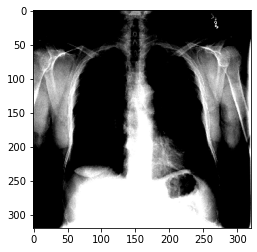

In [15]:
x, y = train_generator.__getitem__(20)
plt.imshow(x[0])

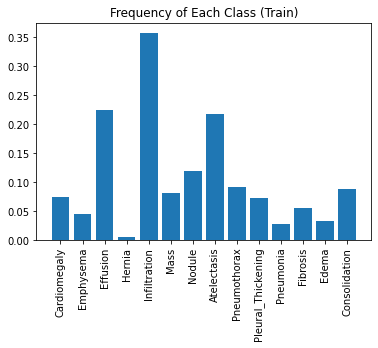

In [16]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class (Train)")
plt.show()

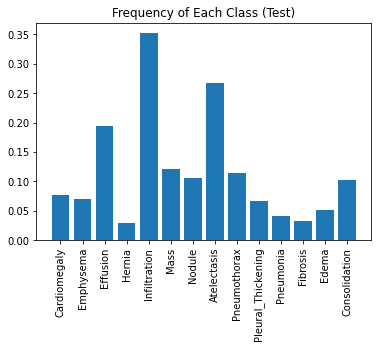

In [17]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(test_generator.labels, axis=0))
plt.title("Frequency of Each Class (Test)")
plt.show()

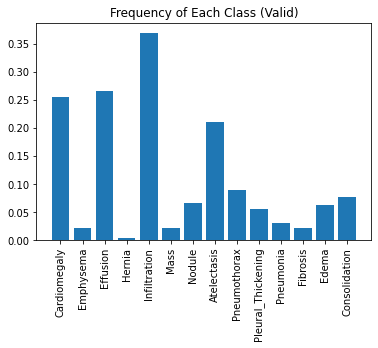

In [18]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(valid_generator.labels, axis=0))
plt.title("Frequency of Each Class (Valid)")
plt.show()

In [19]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.mean(labels, axis=0)
    negative_frequencies = 1 - positive_frequencies

    ### END CODE HERE ###
    return positive_frequencies, negative_frequencies

In [20]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.07397514, 0.04572074, 0.22408302, 0.00493168, 0.357341  ,
       0.08116716, 0.11928491, 0.21719922, 0.09133874, 0.07212576,
       0.02712422, 0.05465941, 0.03226138, 0.08805096])

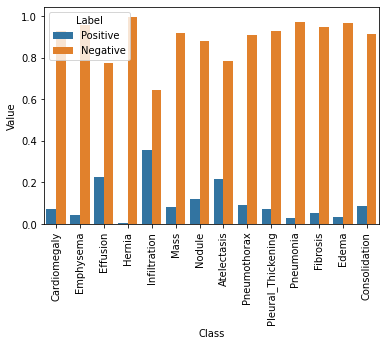

In [21]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [22]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

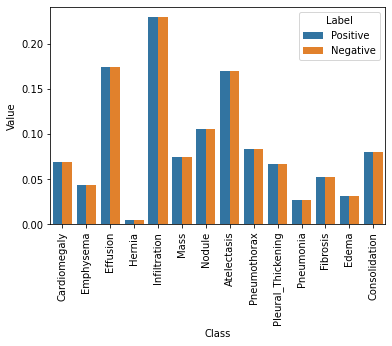

In [23]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [24]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Tensor): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        loss_pos = -1. * K.sum(K.mean(pos_weights * y_true * K.log(y_pred+epsilon), axis=0))
        loss_neg = -1. * K.sum(K.mean(neg_weights * (1 - y_true) * K.log(1-y_pred+epsilon), axis=0))
        return loss_pos+loss_neg
    
        ### END CODE HERE ###
    return weighted_loss

In [25]:
# create the base pre-trained model
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(320,320,3), pooling=None)



29089792/29084464 [==============================] - 1s 0us/step


In [26]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 160, 160, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [27]:
x = base_model.output

In [28]:

x=tf.keras.layers.GlobalAveragePooling2D()(x) 
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.LayerNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)

x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.LayerNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)

# x=tf.keras.layers.Dense(16,activation='relu')(x)
# x=tf.keras.layers.LayerNormalization()(x)
# x=tf.keras.layers.Dropout(0.2)(x)

# Add a final sigmoid layer for classification
predictions = tf.keras.layers.Dense  (len(labels), activation='softmax')(x)           

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)


In [29]:
# set all layers trainable by default
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        # we do aggressive exponential smoothing of batch norm
        # parameters to faster adjust to our new dataset
        layer.momentum = 0.9

In [30]:
print(len(model.layers))

436


In [31]:
for layer in model.layers[:-250]:
    # fix all but batch norm layers, because we neeed to update moving averages for a new dataset!
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=get_weighted_loss(pos_weights, neg_weights), metrics=['acc'])

In [32]:
steps_per_epoch=train_df.shape[0]//16
validation_steps=valid_df.shape[0]//16

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="medical.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

lr_s = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto')

callbacks_list = [checkpoint,lr_s]


In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 160, 160, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [35]:
model.load_weights('/content/drive/My Drive/medical.hdf5')

In [36]:
history = model.fit(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=steps_per_epoch, 
                              validation_steps=validation_steps, 
                              epochs = 20, callbacks=callbacks_list)

Epoch 1/20
608/608 [==============================] - ETA: 0s - loss: 0.6840 - acc: 0.7678
Epoch 00001: loss improved from inf to 0.68404, saving model to medical.hdf5
608/608 [==============================] - 278s 458ms/step - loss: 0.6840 - acc: 0.7678 - val_loss: 4.4287 - val_acc: 0.5469 - lr: 1.0000e-04
Epoch 2/20
608/608 [==============================] - ETA: 0s - loss: 0.6689 - acc: 0.7630
Epoch 00002: loss improved from 0.68404 to 0.66892, saving model to medical.hdf5
608/608 [==============================] - 251s 413ms/step - loss: 0.6689 - acc: 0.7630 - val_loss: 4.3942 - val_acc: 0.5742 - lr: 1.0000e-04
Epoch 3/20
608/608 [==============================] - ETA: 0s - loss: 0.6642 - acc: 0.7668
Epoch 00003: loss improved from 0.66892 to 0.66423, saving model to medical.hdf5
608/608 [==============================] - 254s 417ms/step - loss: 0.6642 - acc: 0.7668 - val_loss: 4.3050 - val_acc: 0.5820 - lr: 1.0000e-04
Epoch 4/20
608/608 [==============================] - ETA: 0s 

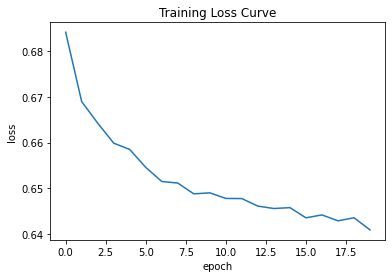

In [37]:
plt.plot(history.history['loss']) 
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [38]:
model.load_weights('/content/medical.hdf5')

In [39]:
predicted_vals = model.predict(test_generator, steps = len(test_generator))

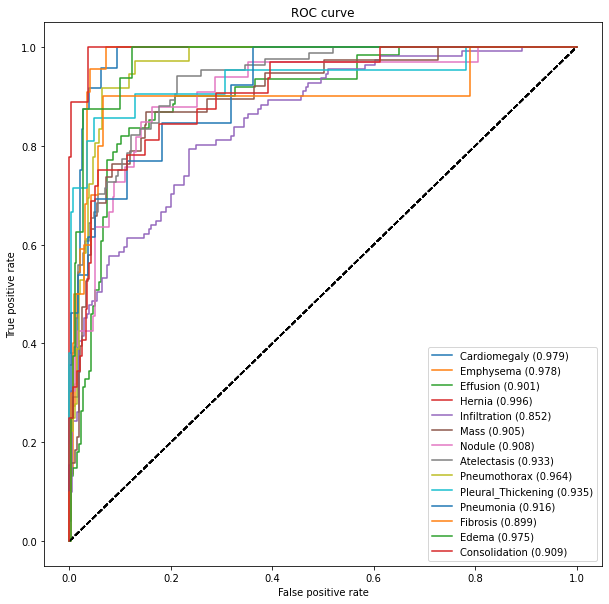

In [42]:
auc_rocs = get_roc_curve(labels, predicted_vals, test_generator)

In [43]:
df = pd.read_csv("/content/drive/My Drive/medical_train.csv")
IMAGE_DIR = "/content/images/"

# only show the lables with top 4 AUC
labels_to_show = np.take(labels, np.argsort(auc_rocs)[::-1])[:8]

In [44]:
labels_to_show

array(['Hernia', 'Cardiomegaly', 'Emphysema', 'Edema', 'Pneumothorax',
       'Pleural_Thickening', 'Atelectasis', 'Pneumonia'], dtype='<U18')

In [45]:
import os
imgs = os.listdir("/content/images")

In [46]:
up=len(imgs)

Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


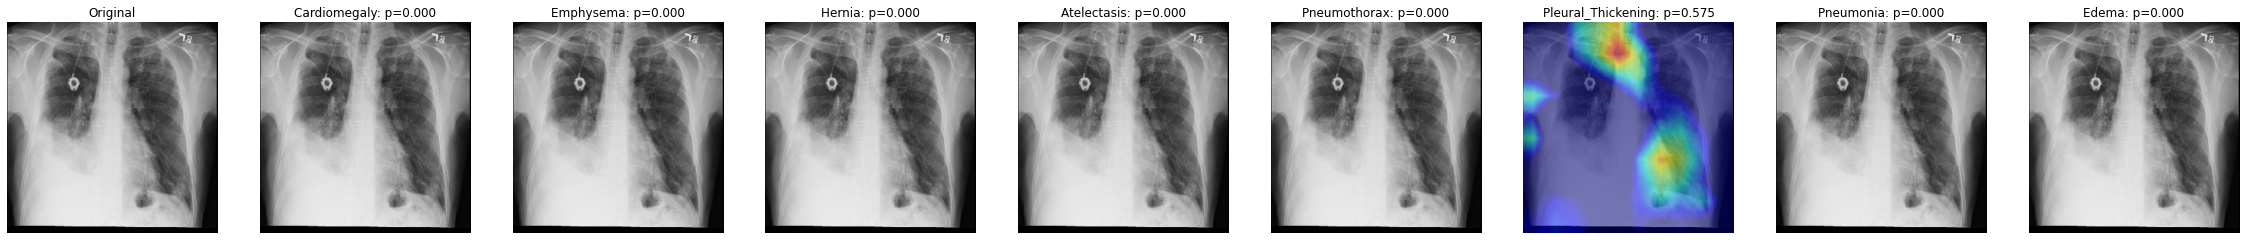

In [47]:
img = '00000061_003.png'
#imgs[np.random.randint(0,up)]
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [48]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
267,267,00000061_003.png,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,61


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


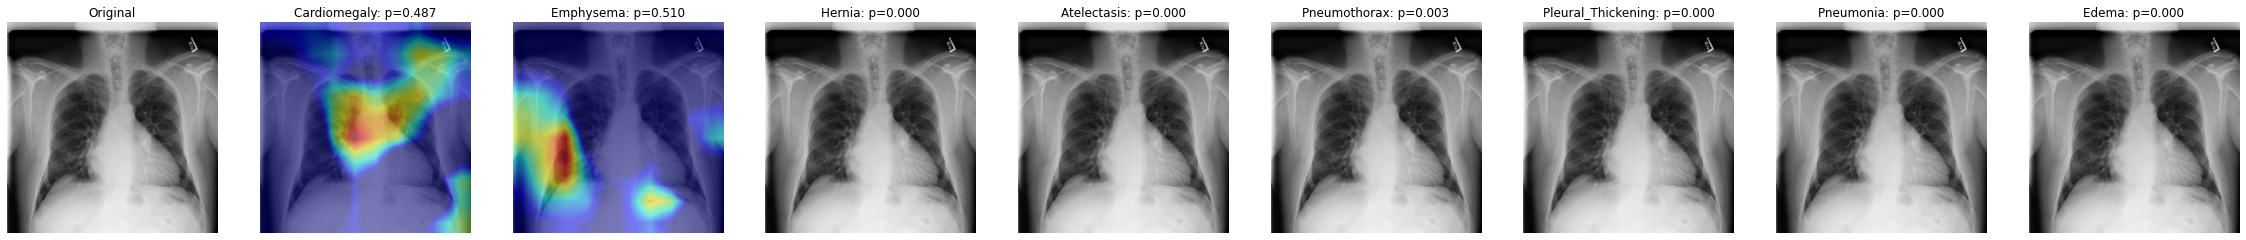

In [49]:
img = '00000001_001.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [50]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
1,1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


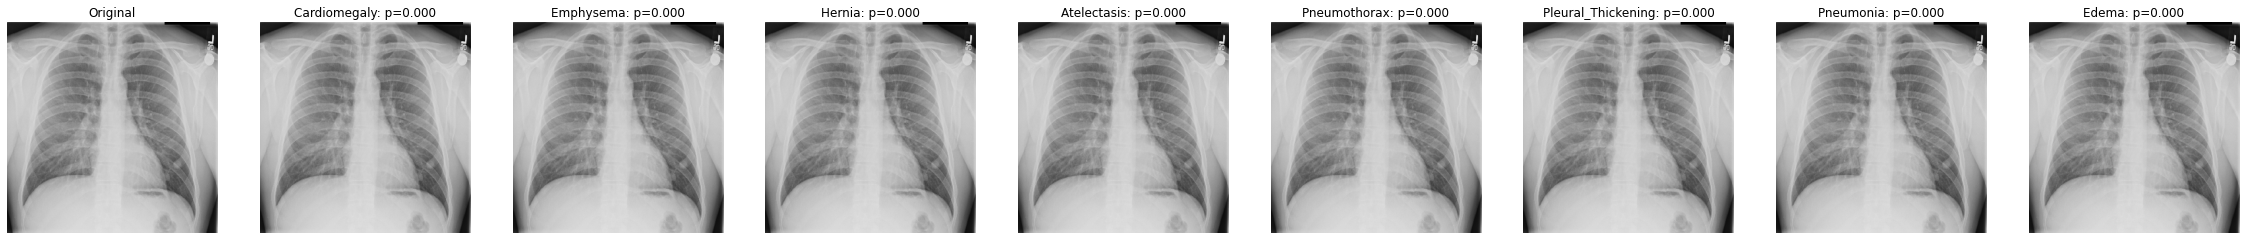

In [51]:
img = '00006360_001.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [52]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
24203,24203,00006360_001.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6360


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


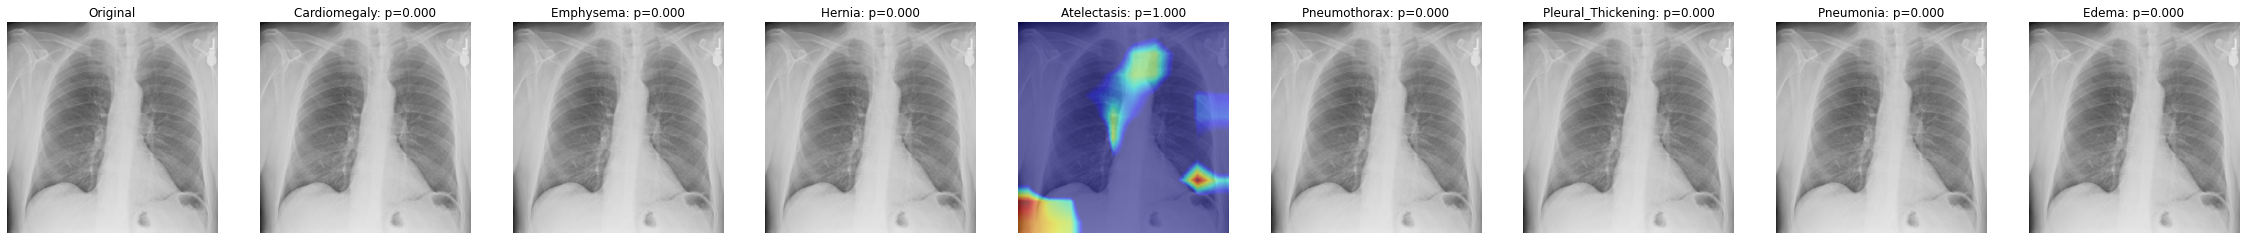

In [53]:
img = '00006393_001.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [54]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
24327,24327,00006393_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6393


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


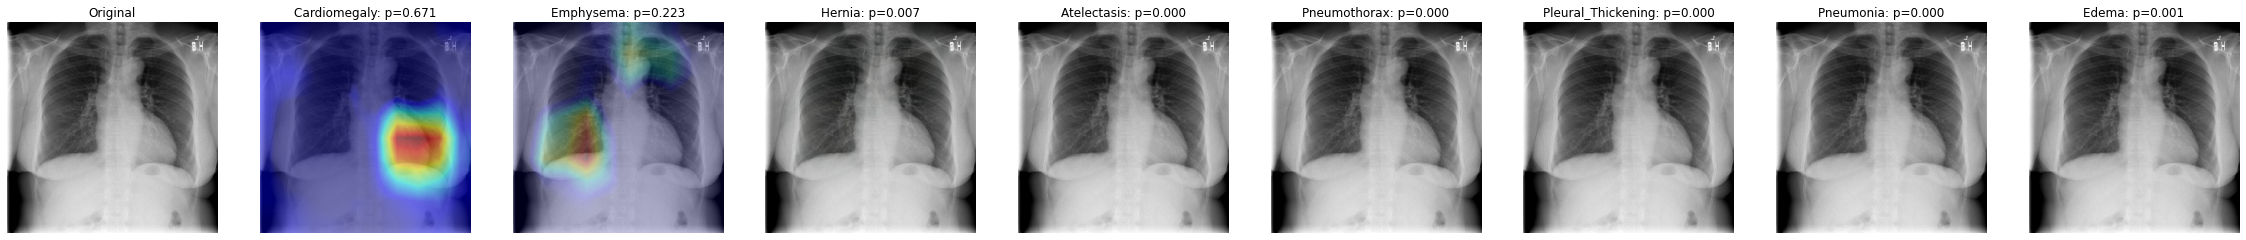

In [55]:
img = '00000294_000.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [56]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
1190,1190,00000294_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,294


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


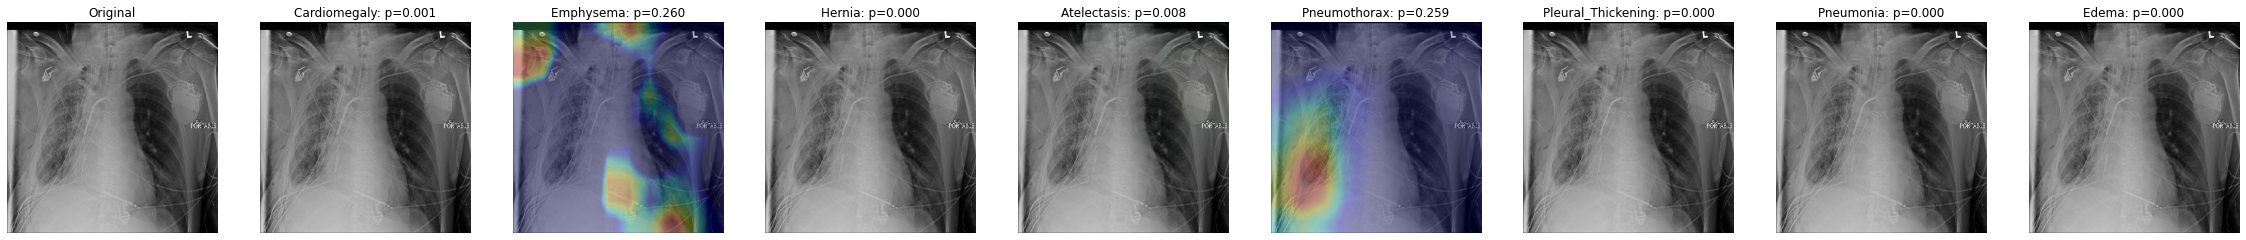

In [57]:
img = '00000013_004.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [58]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
42,42,00000013_004.png,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,13


Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Hernia
Generating gradcam for class Atelectasis
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Edema


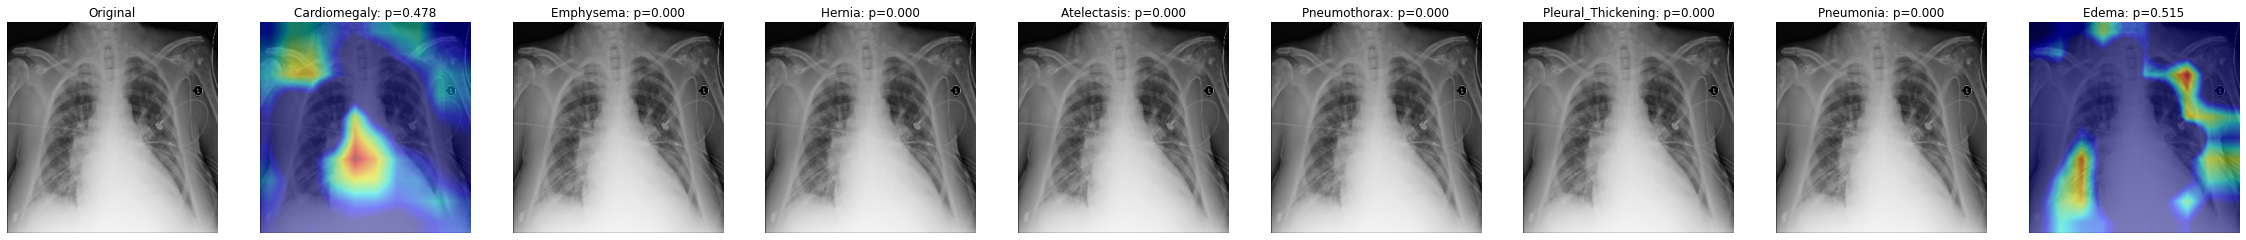

In [59]:
img = '00001373_032.png'
compute_gradcam(model,img , IMAGE_DIR, labels, labels_to_show)

In [61]:
full_df.loc[full_df['Image Index'] == img]

,Unnamed: 0,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Patient ID
5128,5128,00001373_032.png,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1373


In [62]:
!rm '/content/drive/My Drive/medical.hdf5'

In [63]:
!mv /content/medical.hdf5 '/content/drive/My Drive'